In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Read the data 

In [2]:
hd = pd.read_csv("C:/Users/Creacion Tech/Documents/all_perth_310121.csv")

In [3]:
hd.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


Check the number of rows and colums

In [4]:
hd.shape

(33656, 19)

___Data Pre-Processing___

In [5]:
#Exploring the number of samples collected at each SUBURB

hd.groupby('SUBURB')['SUBURB'].agg('count')

SUBURB
Alexander Heights    128
Alfred Cove          120
Alkimos              114
Anketell              19
Applecross            79
                    ... 
Wooroloo              51
Wungong               20
Yanchep              118
Yangebup             132
Yokine                54
Name: SUBURB, Length: 321, dtype: int64

Feature Selection – reduce number of columns.

Drop columns/attributes that are irrelevant to analysing and predicting house prices. 

In [6]:
hd.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859553,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [7]:
hd2 = hd.drop(['ADDRESS', 'BUILD_YEAR','CBD_DIST','NEAREST_SCH_RANK' ,'DATE_SOLD', 'POSTCODE', 'NEAREST_STN_DIST','NEAREST_SCH_DIST','NEAREST_SCH_DIST','LONGITUDE','LATITUDE','CBD_DIST'],axis='columns')
hd2.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,NEAREST_STN,NEAREST_SCH
0,South Lake,565000,4,2,2.0,600,160,Cockburn Central Station,LAKELAND SENIOR HIGH SCHOOL
1,Wandi,365000,3,2,2.0,351,139,Kwinana Station,ATWELL COLLEGE
2,Camillo,287000,3,1,1.0,719,86,Challis Station,KELMSCOTT SENIOR HIGH SCHOOL
3,Bellevue,255000,2,1,2.0,651,59,Midland Station,SWAN VIEW SENIOR HIGH SCHOOL
4,Lockridge,325000,4,1,2.0,466,131,Bassendean Station,KIARA COLLEGE


In [8]:
hd2 = hd2.drop(['NEAREST_STN','NEAREST_SCH'],axis='columns')
hd2.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA
0,South Lake,565000,4,2,2.0,600,160
1,Wandi,365000,3,2,2.0,351,139
2,Camillo,287000,3,1,1.0,719,86
3,Bellevue,255000,2,1,2.0,651,59
4,Lockridge,325000,4,1,2.0,466,131


Data Cleaning.

Check for missing values, smooth noisy data, identify or
remove outliers, resolve inconsistencies.

In [9]:
hd2.isnull().sum()

SUBURB           0
PRICE            0
BEDROOMS         0
BATHROOMS        0
GARAGE        2478
LAND_AREA        0
FLOOR_AREA       0
dtype: int64

Drop GARAGE and BUILD_YEAR features because of the missing values for specific samples.              

In [10]:
hd3 = hd2.dropna()
hd3.isnull().sum()

SUBURB        0
PRICE         0
BEDROOMS      0
BATHROOMS     0
GARAGE        0
LAND_AREA     0
FLOOR_AREA    0
dtype: int64

In [11]:
hd3.shape

(31178, 7)

In [12]:
hd3.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA
0,South Lake,565000,4,2,2.0,600,160
1,Wandi,365000,3,2,2.0,351,139
2,Camillo,287000,3,1,1.0,719,86
3,Bellevue,255000,2,1,2.0,651,59
4,Lockridge,325000,4,1,2.0,466,131


In [13]:
hd3.tail(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA
33651,South Fremantle,1040000,4,3,2.0,292,245
33652,Westminster,410000,3,2,2.0,228,114
33653,Westminster,427000,3,2,2.0,261,112
33654,Girrawheen,295000,3,1,2.0,457,85
33655,Midland,295000,3,1,2.0,296,95


Attribute/feature construction  or engineering

New attributes are constructed from the given ones (derived attributes)

In [15]:
#derive Price per LAND AREA

hd4 = hd3.copy()
hd4['PRICE_PER_FLOOR_AREA'] = hd4['PRICE']/hd4['FLOOR_AREA']

In [16]:
hd4.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,PRICE_PER_FLOOR_AREA
0,South Lake,565000,4,2,2.0,600,160,3531.250000
1,Wandi,365000,3,2,2.0,351,139,2625.899281
2,Camillo,287000,3,1,1.0,719,86,3337.209302
3,Bellevue,255000,2,1,2.0,651,59,4322.033898
4,Lockridge,325000,4,1,2.0,466,131,2480.916031


In [17]:
#Check the number of unique SUBURBS in the data

hd4.SUBURB.unique()

array(['South Lake', 'Wandi', 'Camillo', 'Bellevue', 'Lockridge',
       'Mount Richon', 'Hilbert', 'Waikiki', 'Hamersley', 'Bayswater',
       'Carmel', 'Butler', 'Balga', 'Hammond Park', 'Wattle Grove',
       'Bull Creek', 'Bullsbrook', 'Maida Vale', 'Koongamia',
       'Mount Nasura', 'Forrestdale', 'Atwell', 'Ashby', 'Woodbridge',
       'Bicton', 'Singleton', 'South Guildford', 'Armadale', 'Kenwick',
       'Hamilton Hill', 'Port Kennedy', 'Roleystone', 'Glen Forrest',
       'Secret Harbour', 'Herne Hill', 'Gwelup', 'Harrisdale',
       'North Fremantle', 'Quinns Rocks', 'Spearwood', 'Parkwood',
       'Tapping', 'Thornlie', 'Baldivis', 'Kensington', 'Kiara', 'Menora',
       'Southern River', 'Bibra Lake', 'Swanbourne', 'The Vines',
       'Stratton', 'North Beach', 'Madeley', 'Wembley Downs', 'Bentley',
       'Manning', 'Warwick', 'Queens Park', 'Medina', 'Merriwa',
       'Aubin Grove', 'Karrinyup', 'Gooseberry Hill', 'Darch', 'Hillarys',
       'Alexander Heights', 'St Jame

In [18]:
len(hd4.SUBURB.unique())

319

In [19]:
hd4.head(5)

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,PRICE_PER_FLOOR_AREA
0,South Lake,565000,4,2,2.0,600,160,3531.250000
1,Wandi,365000,3,2,2.0,351,139,2625.899281
2,Camillo,287000,3,1,1.0,719,86,3337.209302
3,Bellevue,255000,2,1,2.0,651,59,4322.033898
4,Lockridge,325000,4,1,2.0,466,131,2480.916031


In [20]:
dummies  = pd.get_dummies(hd4.SUBURB)
dummies.head(5)

,Alexander Heights,Alfred Cove,Alkimos,Anketell,Applecross,Ardross,Armadale,Ascot,Ashby,Ashfield,...,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup,Yokine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
hd5 = pd.concat([hd4,dummies.drop('Yokine',axis='columns')],axis='columns')
hd5.head()

,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,PRICE_PER_FLOOR_AREA,Alexander Heights,Alfred Cove,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,South Lake,565000,4,2,2.0,600,160,3531.250000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Wandi,365000,3,2,2.0,351,139,2625.899281,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Camillo,287000,3,1,1.0,719,86,3337.209302,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bellevue,255000,2,1,2.0,651,59,4322.033898,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Lockridge,325000,4,1,2.0,466,131,2480.916031,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
hd5 = hd5.drop(['SUBURB'],axis='columns')
hd5.head(5)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,PRICE_PER_FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,565000,4,2,2.0,600,160,3531.250000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2.0,351,139,2625.899281,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1.0,719,86,3337.209302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2.0,651,59,4322.033898,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2.0,466,131,2480.916031,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
hd5[hd5.BEDROOMS<2].head(5)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,PRICE_PER_FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
617,950000,1,1,1.0,221,95,10000.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
687,400000,1,1,2.0,181,73,5479.452055,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,1330000,1,1,2.0,659,322,4130.434783,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1738,427000,1,1,1.0,93,61,7000.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,560000,1,1,2.0,787,105,5333.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
print(hd5.dtypes)

PRICE          int64
BEDROOMS       int64
BATHROOMS      int64
GARAGE       float64
LAND_AREA      int64
              ...   
Woodvale       uint8
Wooroloo       uint8
Wungong        uint8
Yanchep        uint8
Yangebup       uint8
Length: 325, dtype: object


In [25]:
#convert GARAGE data type to int

hd5 = hd5.astype({'GARAGE':'int'})
print(hd5.dtypes)

PRICE        int64
BEDROOMS     int64
BATHROOMS    int64
GARAGE       int32
LAND_AREA    int64
             ...  
Woodvale     uint8
Wooroloo     uint8
Wungong      uint8
Yanchep      uint8
Yangebup     uint8
Length: 325, dtype: object


In [26]:
hd5.head(5)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,PRICE_PER_FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,565000,4,2,2,600,160,3531.250000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2,351,139,2625.899281,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1,719,86,3337.209302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2,651,59,4322.033898,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2,466,131,2480.916031,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Outlier Detection and Removal

In [27]:
hd5["FLOOR_AREA"].quantile(0.50)

172.0

In [28]:
# Detecting any outliers in number of bedrooms per floor area in square meters.

# Checking median bedroom size 

hd5['BEDROOMS'].median()

4.0

In [29]:
# Checking median floor area size 

hd5['FLOOR_AREA'].median()

172.0

In [30]:
# Checking %5 quantile in floor area size 

hd5["FLOOR_AREA"].quantile(0.05)

93.0

In [31]:
# Checking %95 quantile in floor area size 

hd5["FLOOR_AREA"].quantile(0.95)

311.0

In [32]:
# Checking for fields where FLOOR AREA is higher than %5 quantile and lower than %95 quantile

df = (hd5['FLOOR_AREA'] > hd5["FLOOR_AREA"].quantile(0.05)) & (hd5['FLOOR_AREA'] < hd5["FLOOR_AREA"].quantile(0.95))

In [33]:
df.tail(10)

33646     True
33647    False
33648     True
33649     True
33650     True
33651     True
33652     True
33653     True
33654    False
33655     True
Name: FLOOR_AREA, dtype: bool

In [34]:
hd5.head(10)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,PRICE_PER_FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,565000,4,2,2,600,160,3531.250000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2,351,139,2625.899281,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1,719,86,3337.209302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2,651,59,4322.033898,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2,466,131,2480.916031,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,409000,4,2,1,759,118,3466.101695,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,400000,3,2,2,386,132,3030.303030,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,370000,4,2,2,468,158,2341.772152,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,565000,4,2,3,875,168,3363.095238,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,685000,3,2,8,552,126,5436.507937,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
hd5.shape

(31178, 325)

In [36]:
# Number of houses where floor area per room is over 70 square meters. These fields are treated as errors, extreme values and outliers.

# It is important to have expert knowledge of floor area size of houses per bedroom in the location under review.


len(hd5[hd5.FLOOR_AREA/hd5.BEDROOMS>70])

2927

In [37]:
# Number of fields with values where floor area per room is less than 40 square meters. These fields are treated as errors, extreme values and outliers.

len(hd5[hd5.FLOOR_AREA/hd5.BEDROOMS<40])

8922

In [37]:
# We removed the extreme values in houses floor area size per bedroom from our data.

# housedata6 = housedata5[~(housedata5.FLOOR_AREA/housedata5.BEDROOMS<40)]

In [38]:
# housedata6.shape

In [39]:
# housedata7 = housedata6[~(housedata6.FLOOR_AREA/housedata6.BEDROOMS>70)]

In [40]:
# housedata7.shape

In [41]:
# housedata7.head()

In [38]:
hd7 = hd5

In [43]:
#housedata7[housedata7.BEDROOMS<2].head(5)

In [44]:
# housedata7[housedata7.BEDROOMS>4].head(5)

In [39]:
hd7.PRICE_PER_FLOOR_AREA.describe()

count     31178.000000
mean       3661.554072
std        5145.015110
min         187.165775
25%        2574.626866
50%        3211.237251
75%        4219.547577
max      680000.000000
Name: PRICE_PER_FLOOR_AREA, dtype: float64

Text(0, 0.5, 'Count')

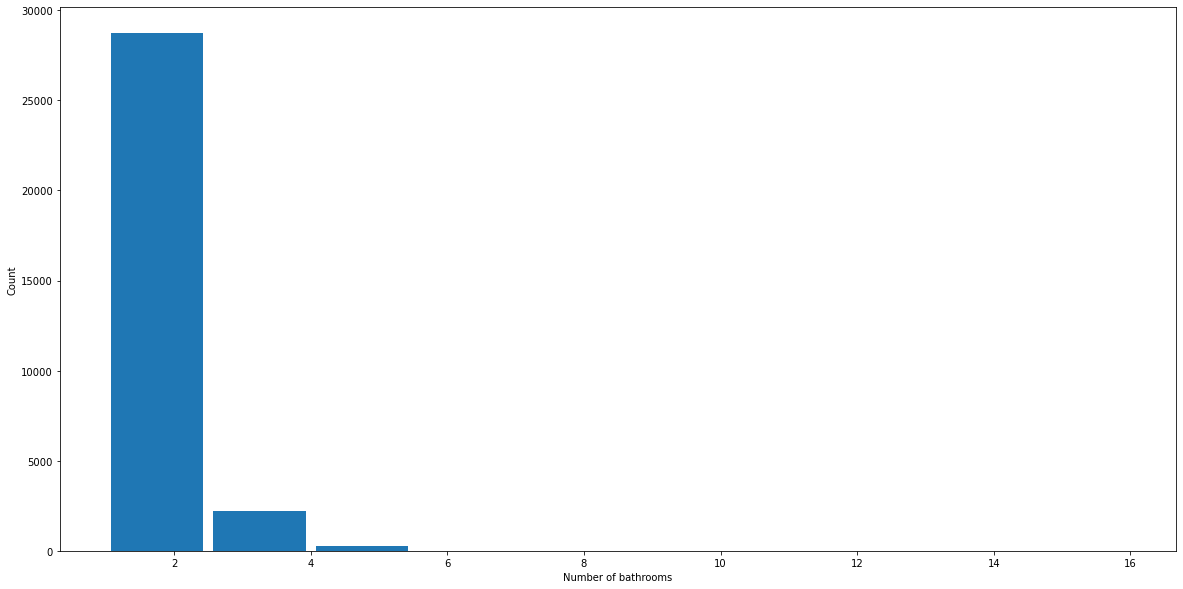

In [40]:


plt.hist(hd7.BATHROOMS,rwidth=.9)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

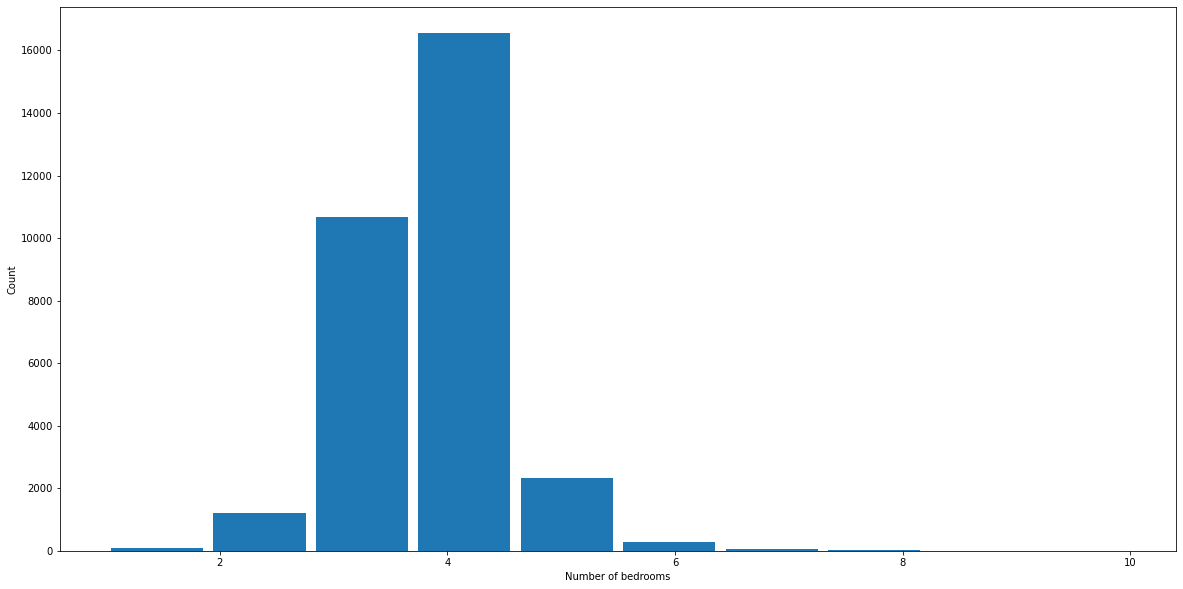

In [41]:


plt.hist(hd7.BEDROOMS,rwidth=.9)
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")

In [42]:
hd8 = hd7.drop("PRICE_PER_FLOOR_AREA", axis='columns')
hd8.head(5)

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,Anketell,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,565000,4,2,2,600,160,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,365000,3,2,2,351,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,287000,3,1,1,719,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255000,2,1,2,651,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325000,4,1,2,466,131,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


___Data Modelling___

In [43]:
X = hd8.drop('PRICE', axis="columns")
X.head(5)

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,Anketell,Applecross,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,4,2,2,600,160,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,2,2,351,139,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,719,86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,2,651,59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,466,131,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = hd8.PRICE
y.head()

0    565000
1    365000
2    287000
3    255000
4    325000
Name: PRICE, dtype: int64

Model Training

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [46]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7596604659030681

Use K Fold cross validation to measure accuracy of our LinearRegression model

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77709368, 0.76676213, 0.77662215, 0.76385535, 0.77750629])


Find best model using GridSearchCV


In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Creacion Tech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332706425504064.5, tolerance: 313567917726.2782
  model = cd_fast.enet_coordinate_descent(
C:\Users\Creacion Tech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354346490421536.44, tolerance: 312180551287.7785
  model = cd_fast.enet_coordinate_descent(
C:\Users\Creacion Tech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357707269430066.06, tolerance: 311692633086.3943
  model = cd_fast.enet_coordinate_descent(
C:\Users\Creacion Tech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

,model,best_score,best_params
0,linear_regression,0.772368,{'normalize': False}
1,lasso,0.772448,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.617164,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [64]:
X.columns

Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'Alexander Heights', 'Alfred Cove', 'Alkimos', 'Anketell', 'Applecross',
       ...
       'Willetton', 'Wilson', 'Winthrop', 'Woodbridge', 'Woodlands',
       'Woodvale', 'Wooroloo', 'Wungong', 'Yanchep', 'Yangebup'],
      dtype='object', length=323)

In [55]:
def predict_price(SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA):    
    loc_index = np.where(X.columns==SUBURB)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = BEDROOMS
    x[1] = BATHROOMS
    x[2] = GARAGE
    x[3] = LAND_AREA
    x[4] = FLOOR_AREA
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [66]:
predict_price('Yanchep',4, 2, 2,700,200)

431409.7850604425

In [67]:
predict_price('Yanchep', 3, 2, 2, 600, 160)

323357.0948387069

In [65]:
predict_price('Winthrop',3, 2, 2,600,190)

805363.9056721623

In [48]:
hd9 = hd7.drop(["LAND_AREA", 'GARAGE','BEDROOMS', 'BATHROOMS','PRICE_PER_FLOOR_AREA'], axis='columns')
hd9.head(5)

,PRICE,FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,Anketell,Applecross,Ardross,Armadale,Ascot,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,565000,160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,365000,139,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,287000,86,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,255000,59,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,325000,131,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
L = hd9.drop('PRICE', axis="columns")
L.head(5)

,FLOOR_AREA,Alexander Heights,Alfred Cove,Alkimos,Anketell,Applecross,Ardross,Armadale,Ascot,Ashby,...,Willetton,Wilson,Winthrop,Woodbridge,Woodlands,Woodvale,Wooroloo,Wungong,Yanchep,Yangebup
0,160,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,139,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,131,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
m = hd9.PRICE
m.head()

0    565000
1    365000
2    287000
3    255000
4    325000
Name: PRICE, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
L_train, L_test, m_train, m_test = train_test_split(L,m,test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
lr_sh = LinearRegression()
lr_sh.fit(L_train, m_train)
lr_sh.score(L_test, m_test)

0.7504333850285186

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), L, m, cv=cv)x


array([0.76950856, 0.75418861, 0.77106053, 0.75193016, 0.76554435])

In [62]:
import pickle
with open('perth_housing_prices_model','wb') as f:
    pickle.dump(lr_clf, f)

In [63]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open ('columns.json', "w") as f:
    f.write(json.dumps(columns))